###  FIND ALL DATA BIAS

In [1]:
# from covid_import import *
from covid import *
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 6

Start importing World-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [19]:
%%time
list_confirmed = [(country, y_dat_confirmed_ByDay[country][-1][1]) for country in infected_countries_latest]    
countries_highestConfByDay = sorted(list_confirmed, key=lambda x: x[1], reverse=True)
countries_lowestConfByDay = sorted(list_confirmed, key=lambda x: x[1], reverse=False)

list_fatal = [(country, y_dat_deaths_ByDay[country][-1][1]) for country in infected_countries_latest]
countries_highestFatalByDay = sorted(list_fatal, key=lambda x: x[1], reverse=True)
countries_lowestFatalByDay = sorted(list_fatal, key=lambda x: x[1], reverse=False)

list_recovered = [(country, y_dat_recovered_ByDay[country][-1][1]) for country in infected_countries_latest]
countries_highestRecByDay = sorted(list_recovered, key=lambda x: x[1], reverse=True)
countries_lowestRecByDay = sorted(list_recovered, key=lambda x: x[1], reverse=False)

CPU times: user 1.72 ms, sys: 0 ns, total: 1.72 ms
Wall time: 1.74 ms


In [28]:
tmp = pd.DataFrame(list_confirmed, columns=['Country', 'confirmed'])
tmp.sort_values(by='confirmed', ascending=False)


,Country,confirmed
178,US,104015
62,France,20588
182,United Kingdom,18363
142,Russia,16379
85,Italy,13439
...,...,...
158,Solomon Islands,0
22,Botswana,0
161,South Sudan,0
48,Diamond Princess,0


In [29]:
%%time
# TODO: speed up using Numpy and Pandas
list_confirmed = [(country, y_dat_confirmed_ByDay[country][-1][1]) for country in infected_countries_latest]
list_confirmed = pd.DataFrame(list_confirmed, columns=['Country', 'confirmed'])
list_confirmed.sort_values(by='confirmed', ascending=False)
list_confirmed.sort_values(by='confirmed')

# countries_highestConfByDay = sorted(list_confirmed, key=lambda x: x[1], reverse=True)
# countries_lowestConfByDay = sorted(list_confirmed, key=lambda x: x[1], reverse=False)

list_fatal = [(country, y_dat_deaths_ByDay[country][-1][1]) for country in infected_countries_latest]
list_fatal = pd.DataFrame(list_fatal, columns=['Country', 'fatal'])
list_fatal.sort_values(by='fatal', ascending=False)
list_fatal.sort_values(by='fatal')

# list_fatal = [(country, y_dat_deaths_ByDay[country][-1][1]) for country in infected_countries_latest]
# countries_highestFatalByDay = sorted(list_fatal, key=lambda x: x[1], reverse=True)
# countries_lowestFatalByDay = sorted(list_fatal, key=lambda x: x[1], reverse=False)

list_recovered = [(country, y_dat_recovered_ByDay[country][-1][1]) for country in infected_countries_latest]
list_recovered = pd.DataFrame(list_recovered, columns=['Country', 'recovered'])
list_recovered.sort_values(by='recovered', ascending=False)
list_recovered.sort_values(by='recovered')

# list_recovered = [(country, y_dat_recovered_ByDay[country][-1][1]) for country in infected_countries_latest]
# countries_highestRecByDay = sorted(list_recovered, key=lambda x: x[1], reverse=True)
# countries_lowestRecByDay = sorted(list_recovered, key=lambda x: x[1], reverse=False)

CPU times: user 9.76 ms, sys: 16 µs, total: 9.78 ms
Wall time: 8.69 ms


,Country,recovered
95,Laos,0.0
131,Oman,0.0
130,Norway,0.0
126,Nicaragua,0.0
39,Congo (Brazzaville),0.0
...,...,...
85,Italy,15138.0
84,Israel,18322.0
142,Russia,22546.0
23,Brazil,32844.0


In [16]:
np.sort(list_confirmed, axis=0)
list_confirmed


array([['65', 'Afghanistan'],
       ['1130', 'Albania'],
       ['0', 'Algeria'],
       ['34', 'Andorra'],
       ['32', 'Angola'],
       ['11', 'Antigua and Barbuda'],
       ['6680', 'Argentina'],
       ['211', 'Armenia'],
       ['3', 'Australia'],
       ['1333', 'Austria'],
       ['115', 'Azerbaijan'],
       ['0', 'Bahamas'],
       ['515', 'Bahrain'],
       ['305', 'Bangladesh'],
       ['20', 'Barbados'],
       ['1787', 'Belarus'],
       ['2438', 'Belgium'],
       ['24', 'Belize'],
       ['0', 'Benin'],
       ['0', 'Bhutan'],
       ['1218', 'Bolivia'],
       ['0', 'Bosnia and Herzegovina'],
       ['0', 'Botswana'],
       ['0', 'Brazil'],
       ['1', 'Brunei'],
       ['493', 'Bulgaria'],
       ['84', 'Burkina Faso'],
       ['0', 'Burma'],
       ['19', 'Burundi'],
       ['74', 'Cabo Verde'],
       ['2', 'Cambodia'],
       ['1081', 'Cameroon'],
       ['3264', 'Canada'],
       ['0', 'Central African Republic'],
       ['23', 'Chad'],
       ['4063', 'Chile'

In [28]:
len(x_dat)

382

In [25]:
# for day in range(len(data_us)):
for col in data_us[0].columns:
    if not data_us[0][col].isnull().values.any():
        print(col)
data_us[0]['Confirmed'].isnull().values.any() #.isnull().values.any()

Province_State
Country_Region
Last_Update
Lat
Long_
Confirmed
Deaths
Recovered
Active
FIPS
Incident_Rate
People_Tested
People_Hospitalized
Mortality_Rate
UID
ISO3
Testing_Rate
Hospitalization_Rate


False

In [27]:
numbers = {'set_of_numbers': [1,2,3,4,5,np.nan,6,7,np.nan,8,9,10,np.nan]}
df = pd.DataFrame(numbers,columns=['set_of_numbers'])

check_for_nan = df['set_of_numbers'].isnull().values.any()
print (check_for_nan)

True


In [38]:
np.array(ratioFatalByDay) < np.array(ratioRecByDay)

array([ True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
totalconfirmed_by_day > totalrecovered_by_day, totalconfirmed_by_day > totalfatalities_by_day

(True, True)

In [40]:
totalconfirmed_by_day

[557.0,
 1097.0,
 941.0,
 1437,
 2118,
 2927,
 5578,
 6165,
 8235,
 9925,
 12038,
 16787,
 19881,
 23892,
 27636,
 30818,
 34392,
 37121,
 40151,
 42763,
 44803,
 45222,
 60370,
 66887,
 69033,
 71226,
 73260,
 75138,
 75641,
 76199,
 76843,
 78599,
 78985,
 79570,
 80415,
 81397,
 82756,
 84125,
 86012,
 88368,
 90311,
 92856,
 95127,
 97936,
 101763,
 105832,
 109820,
 113776,
 118587,
 125850,
 128329,
 145182,
 156084,
 167408,
 181571,
 197205,
 214983,
 242674,
 272268,
 304672,
 337867,
 378498,
 417891,
 467535,
 529674,
 593447,
 660731,
 720010,
 782363,
 857474,
 932424,
 1013000,
 1095745,
 1175839,
 1249493,
 1321234,
 1394919,
 1480228,
 1563672,
 1657110,
 1735167,
 1834310,
 1904355,
 1975657,
 2055574,
 2152147,
 2239794,
 2321117,
 2400898,
 2471984,
 2549043,
 2627680,
 2708317,
 2811332,
 2897485,
 2971887,
 3042300,
 3117208,
 3195905,
 3259204,
 3346773,
 3429780,
 3508943,
 3585275,
 3665091,
 3758517,
 3848861,
 3940353,
 4026678,
 4104021,
 4179418,
 4264437,
 

In [2]:
''' Data Preprocessing '''
# collect all data into list all countries of tuple (country, confirmed), (country, fatalities), (country, recovered)
countries = sdata['Country_Region'].unique()

''' Number of all infected countries changed by day '''

# filter column by name and convert Pandas frame to Numpy Array
infected_countries_earliest = np.unique(data[0][data[0]['Confirmed']>0].filter(regex=("Country.*")).values)
infected_countries_latest = np.unique(data[-1][data[-1]['Confirmed']>0].filter(regex=("Country.*")).values)

num_infected_countries = [len(np.unique(data[i][data[i]['Confirmed']>0].filter(regex=("Country.*")).values)) for i in range(len(data))]

In [3]:
len(y_dat_confirmed['US'])

381

In [4]:
dataconfirmed = [dict() for i in range(len(data))]
datafatal = [dict() for i in range(len(data))]
datarecovered = [dict() for i in range(len(data))]

for i in range(len(data)):
    # print("Day: ", i)
    col = data[i].filter(like='Country').columns[0]
    
    for country in infected_countries_latest:
        dataconfirmed[i][country] = y_dat_confirmed[country][i]
        datafatal[i][country] = y_dat_deaths[country][i]
        datarecovered[i][country] = y_dat_recovered[country][i]

In [5]:
dataconfirmed[100]['US']

1104624

In [6]:
datafatal[310]['US']

265197

In [7]:
pdConfirm = pd.DataFrame(data=dataconfirmed, columns=infected_countries_latest)
pdDeaths = pd.DataFrame(data=datafatal, columns=infected_countries_latest)
pdRecovered = pd.DataFrame(data=datarecovered, columns=infected_countries_latest)
pdConfirm

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,2.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,2.0,0,0,0,0
3,0,0,0,0,0,0,0,0,4.0,0,...,0,0,0,0,0,2.0,0,0,0,0
4,0,0,0,0,0,0,0,0,4.0,0,...,0,0,0,0,0,2.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,55059,78992,107578,9972,19829,234,1933853,167088,28823.0,415522,...,3846851,42128,78755,1,127346,1850.0,159443,2122,55042,33548
377,55121,79934,107841,10017,19900,249,1943548,167231,28829.0,416763,...,3863757,42667,78801,1,127752,1882.0,159956,2122,56233,33814
378,55174,80941,108116,10070,19937,249,1952744,167421,28838.0,418283,...,3882972,43215,78859,1,128315,1948.0,160426,2122,57489,33964
379,55231,81993,108381,10137,19996,268,1961635,167568,28842.0,419801,...,3903706,43804,78916,1,128775,1957.0,161087,2122,59003,34171


In [8]:
pdRecovered['US']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
376    10692853.0
377    10750867.0
378    10838960.0
379    10971748.0
380    11030782.0
Name: US, Length: 381, dtype: float64

In [9]:
pdDeaths['US']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
376    443355.0
377    446885.0
378    450797.0
379    455881.0
380    459555.0
Name: US, Length: 381, dtype: float64

In [10]:
keep_values_day = len(data) - len(data_us)

for i in np.arange(keep_values_day, len(data), 1):    
    colname = data[i].filter(regex=("Country.*")).columns    
    data[i].loc[data[i][colname[0]]=='US', 'Recovered']=0

In [11]:
totalrecovered_by_day = [sum(data[day]['Recovered']) for day in x_dat]
totalrecovered_by_day_us = [sum(data_us[day]['Recovered'].fillna(0)) for day in x_dat_us]

# reinitial the number to zero to clean out all previous values
keep_values_day = len(data) - len(data_us)

# for i in np.arange(keep_values_day, len(data), 1):
#     data[i].loc[data[i]['Country_Region']=='US', 'Recovered']=0
    # data[i] = data[i].drop_duplicates()

len(totalrecovered_by_day_us), len(totalrecovered_by_day)

(300, 381)

In [12]:
data[82].loc[data[82]['Country_Region']=='US']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-13 23:07:54,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-13 23:07:54,30.295065,-92.414197,101,5,0,96,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-13 23:07:54,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-13 23:07:54,43.452658,-116.241552,517,6,0,511,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-13 23:07:54,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2758,66.0,0,Guam,US,2020-04-13 23:07:54,13.444300,144.793700,133,5,0,128,"Guam, US"
2785,0.0,0,Northern Mariana Islands,US,2020-04-13 23:07:54,15.097900,145.673900,11,2,0,9,"Northern Mariana Islands, US"
2792,72.0,0,Puerto Rico,US,2020-04-13 23:07:54,18.220800,-66.590100,903,45,0,858,"Puerto Rico, US"
2797,0.0,0,Recovered,US,2020-04-13 23:07:54,0.000000,0.000000,0,0,0,-43482,"Recovered, US"


In [13]:
data[80].loc[data[80]['Country_Region']=='US']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-11 22:45:33,34.223334,-82.461707,9,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-11 22:45:33,30.295065,-92.414197,98,4,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-11 22:45:33,37.767072,-75.632346,15,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-11 22:45:33,43.452658,-116.241552,513,6,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-11 22:45:33,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2748,0.0,0,Northern Mariana Islands,US,2020-04-11 22:45:33,15.097900,145.673900,11,2,0,0,",Northern Mariana Islands,US"
2755,72.0,0,Puerto Rico,US,2020-04-11 22:45:33,18.220800,-66.590100,788,42,0,0,"Puerto Rico, US"
2760,0.0,0,Recovered,US,2020-04-11 22:45:33,0.000000,0.000000,0,0,31270,0,"Recovered, US"
2778,78.0,0,Virgin Islands,US,2020-04-11 22:45:33,18.335800,-64.896300,51,1,0,0,",Virgin Islands,US"


(58577115, 11030782.0)

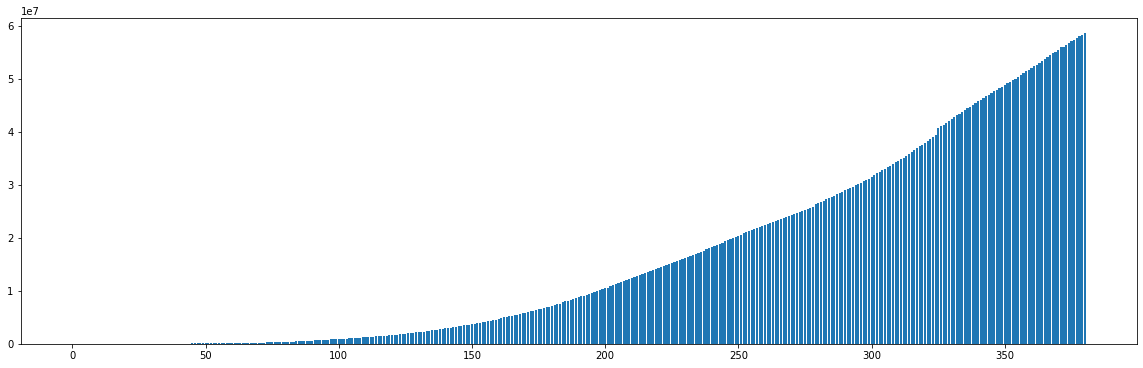

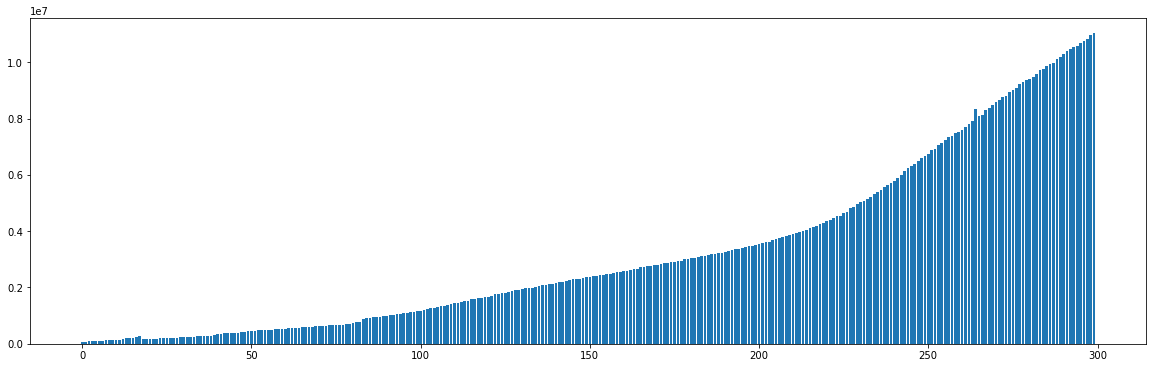

In [14]:
plt.figure(1)
plt.bar(np.arange(len(data)), totalrecovered_by_day)

plt.figure(2)
plt.bar(np.arange(len(data_us)), totalrecovered_by_day_us)

totalrecovered_by_day[-1],  totalrecovered_by_day_us[-1]

In [15]:
data[81].loc[data[81]['Country_Region']=='US']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-12 23:18:00,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-12 23:18:00,30.295065,-92.414197,99,5,0,94,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-12 23:18:00,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-12 23:18:00,43.452658,-116.241552,517,6,0,511,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-12 23:18:00,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2771,0.0,0,Northern Mariana Islands,US,2020-04-12 23:18:00,15.097900,145.673900,11,2,0,9,"Northern Mariana Islands, US"
2778,72.0,0,Puerto Rico,US,2020-04-12 23:18:00,18.220800,-66.590100,897,44,0,853,"Puerto Rico, US"
2783,0.0,0,Recovered,US,2020-04-12 23:18:00,0.000000,0.000000,0,0,0,-32988,"Recovered, US"
2801,78.0,0,Virgin Islands,US,2020-04-12 23:18:00,18.335800,-64.896300,51,1,0,50,"Virgin Islands, US"


old (without USA)  58577115
updated (with USA)  69607897.0


(300, 381, 81, 300, 381, 81, 300, 300, 300)

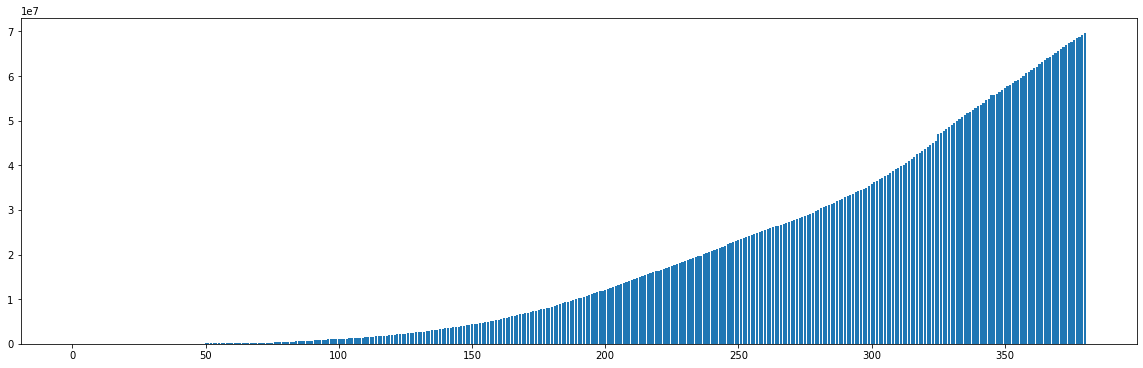

In [16]:
# Init a list of all zero values
update_part = [0 for i in range(len(totalrecovered_by_day_us))]

j = 0

# get Sum of total values without US and values with US
for i in np.arange(len(data)-len(data_us), len(data), 1):    
    update_part[j] = totalrecovered_by_day[i] + totalrecovered_by_day_us[j]
    # print(i, j, totalrecovered_by_day[i], totalrecovered_by_day_us[j], update_part[j])
    j = j+1

totalrecovered = totalrecovered_by_day[0:keep_values_day]  + update_part

plt.bar(np.arange(len(totalrecovered)), totalrecovered)
print("old (without USA) ", totalrecovered_by_day[-1]) 
print("updated (with USA) ", totalrecovered[-1]) 

len(update_part), len(totalrecovered), len(totalrecovered_by_day[0:keep_values_day]), len(totalrecovered_by_day_us), len(data), keep_values_day, len(data_us), len(totalrecovered_by_day_us), len(data)-keep_values_day

In [17]:
# # create dict for date (key as index, value as date)
data_date = dict([(i, files[i]) for i in range(len(files))]) 
# data_date

In [18]:
print("Total days passed: ", len(data))

Total days passed:  381


In [19]:
# Error with data on day 208, 207
day = 208
previous_day = 207
key = 'Deaths'
errors = data[day][key]-data[previous_day][key]

print("FILE TO CHECK: PREVIOUS_DAY {} and DAY {} ".format(data_date[previous_day], data_date[day]))
# print()
# print([(num_idx, diff) for num_idx, diff in enumerate(errors) if diff<0])

FILE TO CHECK: PREVIOUS_DAY 08-16-2020.csv and DAY 08-17-2020.csv 


In [20]:
# data[previous_day].iloc[3942], data[day].iloc[3942] # Example
# sum(data[day][key])-sum(data[previous_day][key])
data[day].iloc[0]

FIPS                                     0
Admin2                                   0
Province_State                           0
Country_Region                 Afghanistan
Last_Update            2020-08-18 04:27:56
Lat                                33.9391
Long_                                67.71
Confirmed                            37667
Deaths                                1378
Recovered                            27166
Active                                9058
Combined_Key                   Afghanistan
Incidence_Rate                     96.5852
Case-Fatality_Ratio                3.65701
Name: 0, dtype: object

In [21]:
# for i in range(len(data[previous_day])):
#     if (data[day].iloc[i].Country_Region == data[previous_day].iloc[i].Country_Region and data[day].iloc[i].Deaths < data[previous_day].iloc[i].Deaths):
#         print(i, data[previous_day].iloc[i].Country_Region, data[previous_day].iloc[i].Deaths, data[day].iloc[i].Deaths)

In [22]:
data[previous_day].iloc[3936], data[day].iloc[3936]

(FIPS                                         0
 Admin2                                       0
 Province_State                         Unknown
 Country_Region                  United Kingdom
 Last_Update                2020-08-17 04:27:20
 Lat                                          0
 Long_                                        0
 Confirmed                                    0
 Deaths                                       0
 Recovered                                    0
 Active                                       0
 Combined_Key           Unknown, United Kingdom
 Incidence_Rate                               0
 Case-Fatality_Ratio                          0
 Name: 3936, dtype: object,
 FIPS                                          0
 Admin2                                        0
 Province_State                         Scotland
 Country_Region                   United Kingdom
 Last_Update                 2020-08-18 04:27:56
 Lat                                     56.4907
 Long_

In [23]:
day = 282
previous_day = 281
key = 'Recovered'
errors = data[day][key]-data[previous_day][key]

print("FILE TO CHECK: PREVIOUS_DAY {} and DAY {} ".format(data_date[previous_day], data_date[day]))
print()
print([(num_idx, diff) for num_idx, diff in enumerate(errors) if diff<0])

FILE TO CHECK: PREVIOUS_DAY 10-29-2020.csv and DAY 10-30-2020.csv 

[(97, -1), (162, -8474), (391, -19), (401, -1)]


In [24]:
data[previous_day].iloc[162], data[day].iloc[162]  # Example to check iloc at index 401

(FIPS                                     0
 Admin2                                   0
 Province_State                     Unknown
 Country_Region                    Colombia
 Last_Update            2020-10-30 04:24:49
 Lat                                      0
 Long_                                    0
 Confirmed                                0
 Deaths                                 173
 Recovered                             8474
 Active                               -8647
 Combined_Key             Unknown, Colombia
 Incidence_Rate                           0
 Case-Fatality_Ratio                      0
 Name: 162, dtype: object,
 FIPS                                     0
 Admin2                                   0
 Province_State                     Unknown
 Country_Region                    Colombia
 Last_Update            2020-10-31 04:24:44
 Lat                                      0
 Long_                                    0
 Confirmed                                0
 Deat

In [25]:
# data_date.keys()
# for day in data_date.keys():    
#     for idx in range(len(data[day])-1):
        # print(day, idx)
#         if (data[day].loc[idx, 'Confirmed'] < 0):
#             print(day, data_date[day], 'Confirmed', idx, data[day].iloc[idx].Confirmed, data[day].iloc[idx].Country_Region)
# data[0][data[0] <0] = 0
# df = pd.DataFrame({'a': [0, -1, 2], 'b': [-3, 2, 1]})
# df

In [26]:
# df.where(df>=0, 0)  # keep all values >0, and replace all negative values with 0

In [27]:
# df.mask(df<0,0)  # replace all negative values with 0

In [28]:
# list(data_date.keys())
# list(data_date.keys())[:-1]
# data[336]
data_date.pop(0)

'01-22-2020.csv'

In [29]:
new_list = np.arange(0, len(list(data_date.keys())[:-1]),1)
new_list

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
for day in new_list:
    data[day].fillna(0)
    data[day][['Confirmed','Deaths','Recovered']] = data[day][['Confirmed','Deaths','Recovered']].mask(data[day][['Confirmed','Deaths','Recovered']]<0, 0)
    # data[day][['Confirmed','Deaths','Recovered']].where(data[day][['Confirmed','Deaths','Recovered']]>=0, 0)

In [31]:
# data[0][['Confirmed','Deaths','Recovered']].where(data[0][['Confirmed','Deaths','Recovered']]>=0, 0)

In [32]:
 #data[0][['Confirmed','Deaths','Recovered']]

In [33]:
# for day in data_date.keys():    
#     for idx in range(len(data[day])-1):
#         # print(day, idx)
#         if (data[day].loc[idx, 'Confirmed'] < 0):
#             print(day, data_date[day], 'Confirmed', idx, data[day].iloc[idx].Confirmed, data[day].iloc[idx].Country_Region)
            
#         if (data[day].iloc[idx].Deaths < 0):
#             print(day, data_date[day], 'Deaths', idx, data[day].iloc[idx].Deaths, data[day].iloc[idx].Country_Region)
            
#         if (data[day].iloc[idx].Recovered < 0):
#             print(day, data_date[day], 'Recovered', idx, data[day].iloc[idx].Recovered, data[day].iloc[idx].Country_Region)

In [34]:
# data[285].loc[data[285]['Country_Region'] == 'Colombia']

In [35]:
# Error: since 22.03.2020 use Country_Region, before that use Country/Region